# Raphael Christiano / 0706022310015

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator

In [63]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [65]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [66]:
if 'Other names' in df.columns:
    df = df.drop(columns=['Other names'])
display(df.head())

# The 'Other names' column was dropped from your DataFrame because it contained redundant
# or less relevant information compared to the 'Country' column, which already serves as a primary identifier.

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [67]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"\nUnique values in '{column}' (Count: {df[column].nunique()}):\n{df[column].unique()}")
    else:
        print(f"\nUnique values in '{column}': (Count: {df[column].nunique()}, Min: {df[column].min()}, Max: {df[column].max()})")


Unique values in 'Country' (Count: 225):
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei ' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'CAR' 'Caribbean Netherlands' 'Cayman Islands' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Democratic Republic of the Congo' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Gibral

# PART 2: EDA

# Task
Clean the DataFrame column names by removing special characters and spaces and then rename 'ISO 3166-1 alpha-3 CODE' to 'ISO_Code', 'Tot Cases//1M pop' to 'Cases_per_1M_pop', 'Tot Deaths/1M pop' to 'Deaths_per_1M_pop', and 'Death percentage' to 'Death_Percentage', and 'Total Cases' to 'Total_Cases', 'Total Deaths' to 'Total_Deaths' to prepare for visualizations.

## Clean and Rename Columns

### Subtask:
Clean the DataFrame column names by removing special characters and spaces, and then rename specific columns to be more consistent and user-friendly (e.g., 'ISO 3166-1 alpha-3 CODE' to 'ISO_Code', 'Tot Cases//1M pop' to 'Cases_per_1M_pop', 'Tot Deaths/1M pop' to 'Deaths_per_1M_pop', and 'Death percentage' to 'Death_Percentage'). This is a prerequisite for the visualizations.


**Reasoning**:
To ensure column names are consistent and easy to work with, I will first clean all column names by replacing special characters and spaces with underscores. After that I will apply the requested renamings to make them more user-friendly.



In [68]:
df.columns = df.columns.str.replace(r'[ /()-]', '_', regex=True).str.replace(r'__', '_', regex=True).str.strip('_')
df = df.rename(columns={
    'ISO_3166-1_alpha-3_CODE': 'ISO_Code',
    'Tot_Cases__1M_pop': 'Cases_per_1M_pop',
    'Tot_Deaths/1M_pop': 'Deaths_per_1M_pop',
    'Death_percentage': 'Death_Percentage',
    'Total_Cases': 'Total_Cases',
    'Total_Deaths': 'Total_Deaths'
})
df.head()

,Country,ISO_3166_1_alpha_3_CODE,Population,Continent,Total_Cases,Total_Deaths,Tot Cases_1M_pop,Tot Deaths_1M_pop,Death_Percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


**Reasoning**:
The previous column renaming step did not fully apply due to a non-breaking space character (\u00a0) not being caught by the initial regex. I need to modify the `str.replace` regex to include the non-breaking space and then apply the renames as specified in the instructions to achieve the desired column names.



In [69]:
df.columns = df.columns.str.replace(r'[ /()\-\u00a0]', '_', regex=True).str.replace(r'__', '_', regex=True).str.strip('_')
df = df.rename(columns={
    'ISO_3166_1_alpha_3_CODE': 'ISO_Code',
    'Tot_Cases_1M_pop': 'Cases_per_1M_pop',
    'Tot_Deaths_1M_pop': 'Deaths_per_1M_pop',
    'Death_percentage': 'Death_Percentage',
    'Total_Cases': 'Total_Cases',
    'Total_Deaths': 'Total_Deaths'
})
df.head()

,Country,ISO_Code,Population,Continent,Total_Cases,Total_Deaths,Cases_per_1M_pop,Deaths_per_1M_pop,Death_Percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


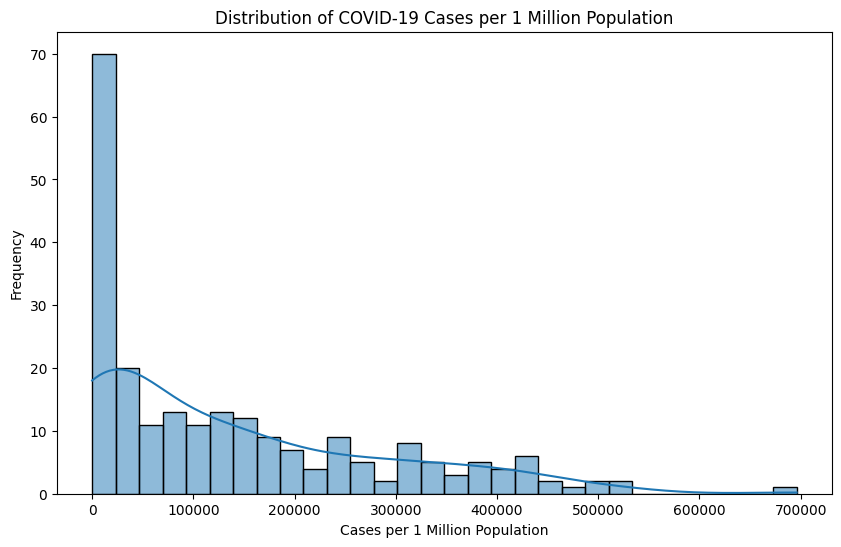

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cases_per_1M_pop'], kde=True, bins=30)
plt.title('Distribution of COVID-19 Cases per 1 Million Population')
plt.xlabel('Cases per 1 Million Population')
plt.ylabel('Frequency')
plt.show()

The histogram of 'Cases_per_1M_pop' offers several key interpretations:

1. Skewed Distribution: The plot likely shows a heavily right-skewed distribution. This means that a large majority of countries have a relatively low number of COVID-19 cases per 1 million population.

2. Concentration at Lower Values: The tallest bars in the histogram are expected to be on the left side, indicating that most countries fall into a category with fewer cases relative to their population size.

3. Presence of Outliers/High-Incidence Countries: The long tail extending to the right signifies that there are a smaller number of countries with exceptionally high rates of COVID-19 cases per 1 million population. These are the outliers that significantly pull the average up but represent a minority of the countries.

4. Implications for Policy: This distribution suggests that while many countries have managed to keep their per-capita case numbers low, certain regions or nations faced a much more severe outbreak relative to their population, potentially due to varying public health measures, population density, testing capacity, or other socio-economic factors.

In [71]:
import plotly.express as px

fig = px.choropleth(
    data_frame=df,
    locations='ISO_Code',
    color='Continent',
    hover_name='Country',
    projection='natural earth',
    title='World Map of Countries by Continent'
)
fig.show()

The choropleth map, where countries are colored by continent, offers several interpretations:

1. Geographical Grouping: The map immediately visualizes the geographical boundaries of each continent as represented in your dataset. You can easily see which countries belong to which continent based on the color coding.

2. Data Completeness/Coverage: The map can also implicitly indicate the coverage of your dataset. Areas of the world that are colored correspond to countries present in your DataFrame, while uncolored areas might represent regions not included in your data.

3. Visual Confirmation of ISO Codes: Since the map uses 'ISO_Code' for locations, it visually confirms that the ISO codes in your dataset are correctly mapping to geographical areas. If there were issues with ISO codes, certain countries might appear uncolored or incorrectly placed.

4. Foundation for Further Analysis: While this specific choropleth map is colored by continent (a categorical variable), it serves as a strong foundation for future visualizations. You could easily change the 'color' parameter to a quantitative variable (like 'Cases_per_1M_pop' or 'Deaths_per_1M_pop') to visually explore how these metrics are distributed geographically across the world and within continents.

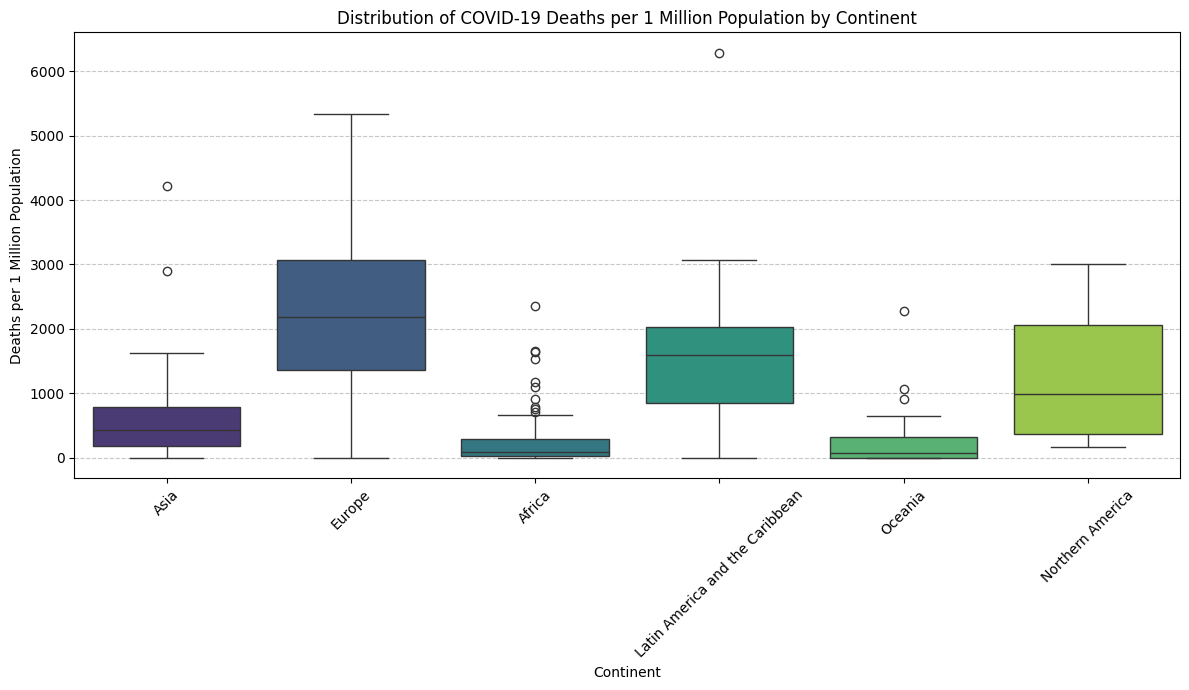

In [72]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Continent', y='Deaths_per_1M_pop', data=df, palette='viridis', hue='Continent', legend=False)
plt.title('Distribution of COVID-19 Deaths per 1 Million Population by Continent')
plt.xlabel('Continent')
plt.ylabel('Deaths per 1 Million Population')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The boxplot visualizing 'Deaths_per_1M_pop' by 'Continent' provides several key insights:

1. Continental Variation: You'll likely observe significant differences in the median 'Deaths_per_1M_pop' and the spread (interquartile range) across continents. Some continents might show higher median death rates, indicating a more severe impact relative to their population.

2. Presence of Outliers: Boxplots effectively highlight outliers, represented by individual points beyond the whiskers. These points correspond to countries within a continent that have exceptionally high or low death rates per million population compared to their continental peers.

3. Spread and Skewness: The length of the box and whiskers indicates the variability and distribution of death rates within each continent. A longer box suggests more varied death rates, while the position of the median within the box can hint at the skewness of the distribution.

4. Comparison of Impact: By comparing the boxes across continents, you can infer which regions were generally more affected in terms of per-capita COVID-19 deaths and which had a tighter or wider range of outcomes among their countries.


# ENCODING and DATA TRANSFORMATION

In [73]:
df = df.drop(columns=['Country', 'ISO_Code'])
display(df.head())

,Population,Continent,Total_Cases,Total_Deaths,Cases_per_1M_pop,Deaths_per_1M_pop,Death_Percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [74]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Continent'] = label_encoder.fit_transform(df['Continent'])
display(df.head())

,Population,Continent,Total_Cases,Total_Deaths,Cases_per_1M_pop,Deaths_per_1M_pop,Death_Percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,0,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,0,99194,1900,2862,55,1.915438


In [75]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate the 'Continent' column
continent_column = df['Continent']
features_to_scale = df.drop(columns=['Continent'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
scaled_features = scaler.fit_transform(features_to_scale)

# Create a DataFrame from the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add the 'Continent' column back to the scaled DataFrame
df_scaled['Continent'] = continent_column.reset_index(drop=True)

# Reorder columns to place 'Continent' in its original position or a desired position
# For simplicity, let's just make sure it's present.
# If you need specific order, we can adjust.

display(df_scaled.head())

,Population,Total_Cases,Total_Deaths,Cases_per_1M_pop,Deaths_per_1M_pop,Death_Percentage,Continent
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0


# 4. Build two clustering models based on best K:
○ KMeans
○ Hierarchical Agglomerative Clustering

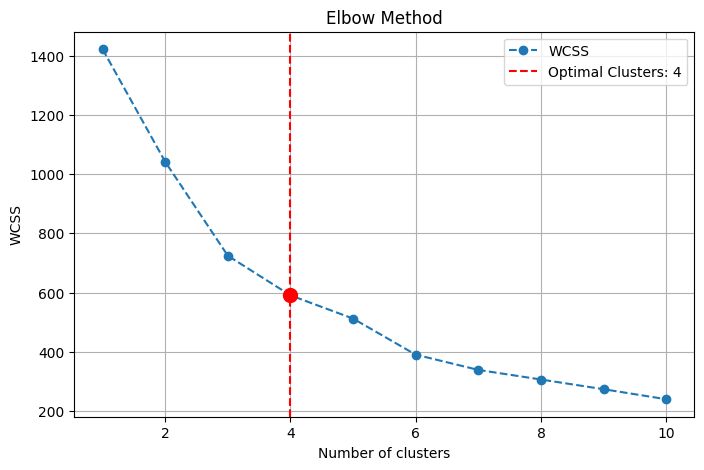

The optimal number of clusters is: 4


In [84]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

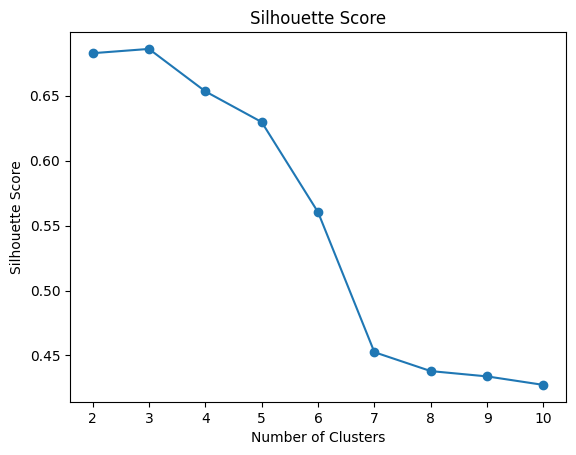

In [86]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with 'manhattan' metric (only 'euclidean' is supported and implicit).


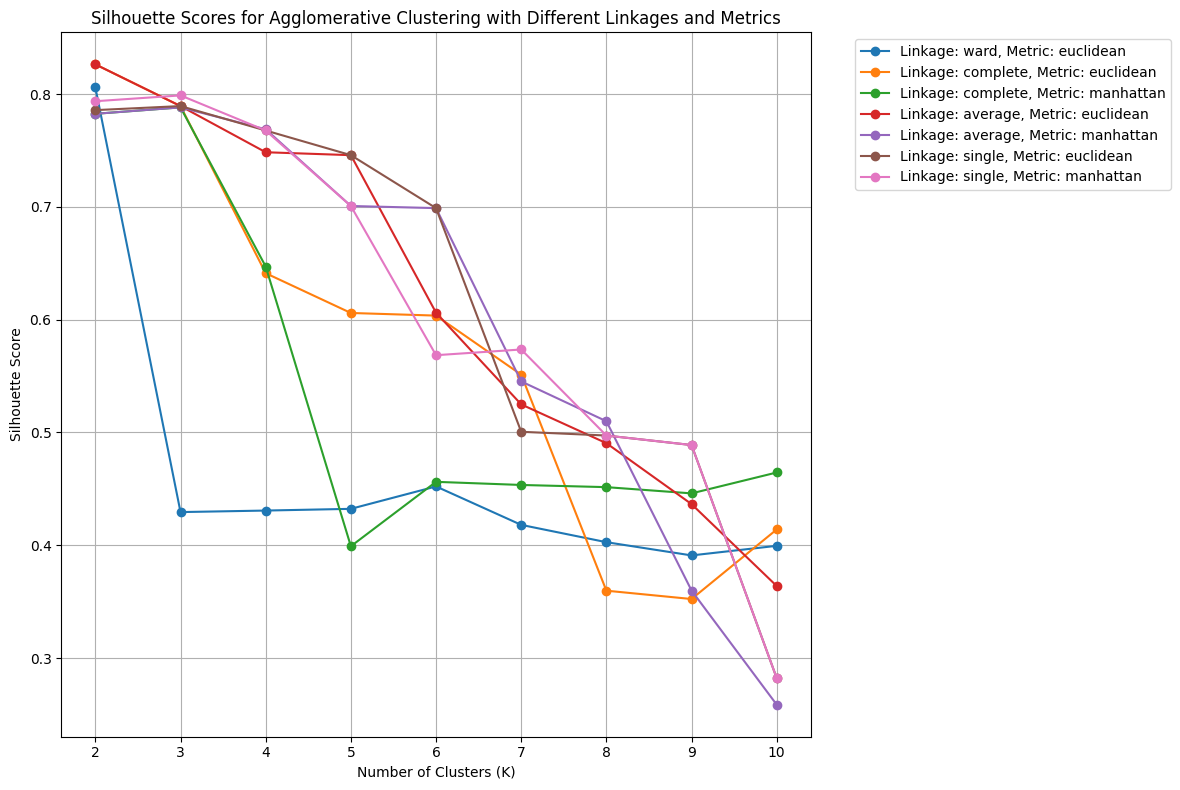


Overall Best Silhouette Score: 0.8263
Optimal Number of Clusters (K): 2
Best Linkage Method: complete
Best Metric: euclidean


In [88]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np # Needed for np.nan

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11) # Testing 2 to 10 clusters
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan'] # Common metrics to align with 'metric' parameter

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = '' # Changed from best_affinity

results_for_plotting = []

# Ensure X_scaled (scaled data excluding 'Continent') is available
# If X_scaled is not defined, it would be df_scaled.drop(columns=['Continent']).values
X = X_scaled.values if isinstance(X_scaled, pd.DataFrame) else X_scaled # Convert to numpy array for consistency

for linkage_method in linkage_methods:
    for metric in metrics: # Changed from affinity
        current_scores = []

        # Ward linkage only works with 'euclidean' metric and does not take a 'metric' parameter explicitly
        if linkage_method == 'ward' and metric != 'euclidean':
            print(f"Skipping Ward linkage with '{metric}' metric (only 'euclidean' is supported and implicit).")
            continue

        for n_clusters in range_n_clusters:
            try:
                # Instantiate AgglomerativeClustering
                if linkage_method == 'ward':
                    # 'ward' linkage only supports euclidean and does not accept the 'metric' parameter
                    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
                else:
                    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)

                # Fit model and predict clusters
                y_agglo = agglo.fit_predict(X)

                # Calculate Silhouette Score
                silhouette_avg = silhouette_score(X, y_agglo)
                current_scores.append(silhouette_avg)

                # Track the best score and parameters
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_n_clusters = n_clusters
                    best_linkage = linkage_method
                    best_metric = metric # Changed from best_affinity

            except Exception as e:
                print(f"Could not compute silhouette score for linkage={linkage_method}, metric={metric}, n_clusters={n_clusters}: {e}")
                current_scores.append(np.nan) # Append NaN if calculation fails

        # Only add to results_for_plotting if current_scores is not empty and contains valid scores
        if current_scores and not all(np.isnan(score) for score in current_scores):
             results_for_plotting.append({
                'label': f"Linkage: {linkage_method}, Metric: {metric}", # Changed label
                'n_clusters': list(range_n_clusters),
                'scores': current_scores
            })

# --- Plotting ---
plt.figure(figsize=(12, 8))

for result in results_for_plotting:
    plt.plot(result['n_clusters'], result['scores'], marker='o', linestyle='-', label=result['label'])

plt.title('Silhouette Scores for Agglomerative Clustering with Different Linkages and Metrics') # Changed title
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(list(range_n_clusters))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the best parameters
print(f"\nOverall Best Silhouette Score: {best_silhouette_score:.4f}")
print(f"Optimal Number of Clusters (K): {best_n_clusters}")
print(f"Best Linkage Method: {best_linkage}")
print(f"Best Metric: {best_metric}") # Changed from Best Affinity Metric

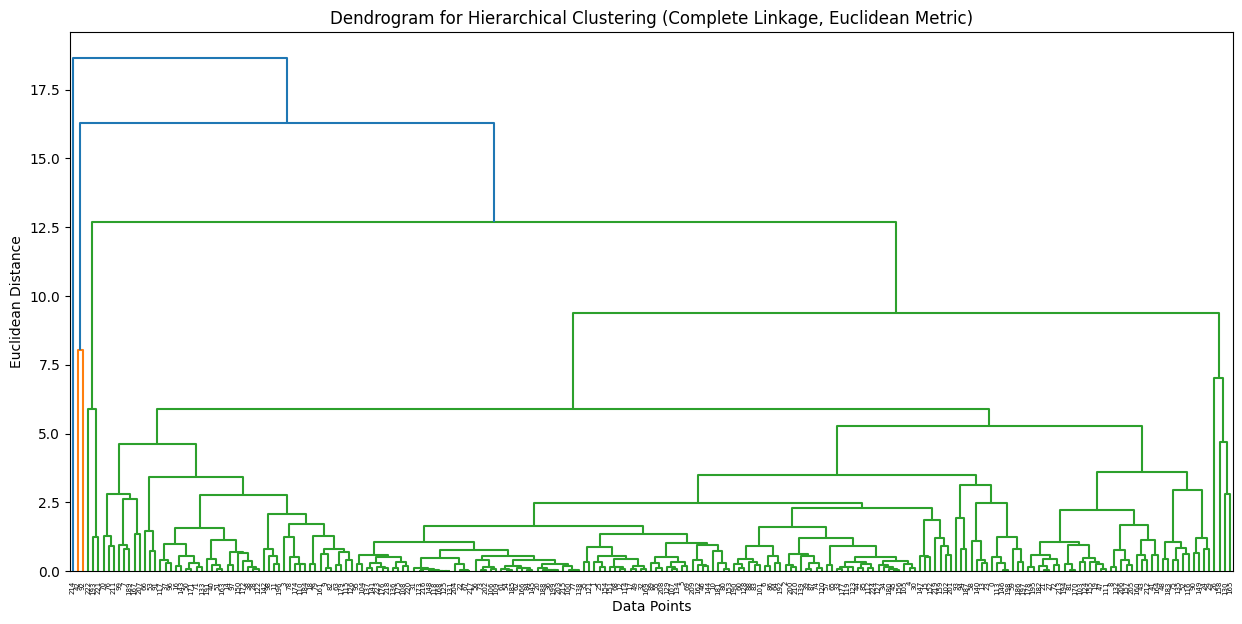

In [92]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Compute the linkage matrix using the best_linkage and best_metric
# From previous output: best_linkage = 'complete', best_metric = 'euclidean'
linked = sch.linkage(X_scaled, method='complete', metric='euclidean')

plt.figure(figsize=(15, 7))
plt.title('Dendrogram for Hierarchical Clustering (Complete Linkage, Euclidean Metric)')
dend = sch.dendrogram(linked)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

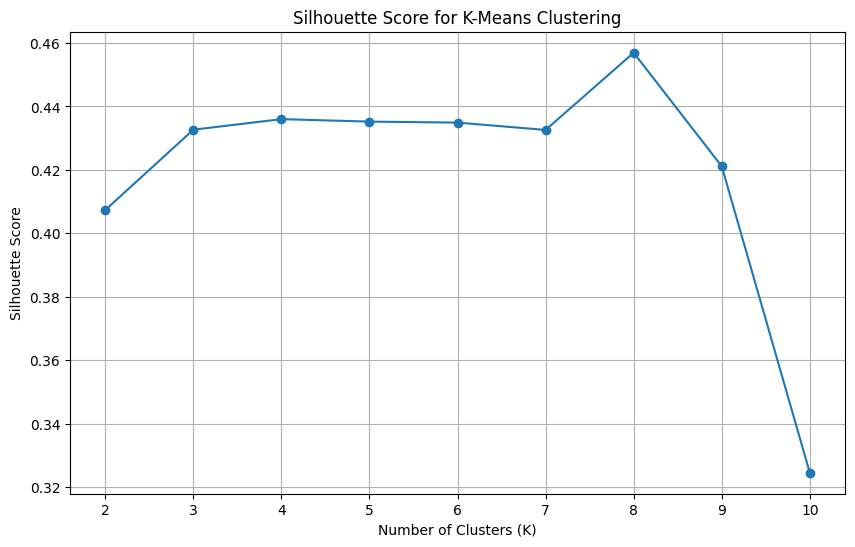

Optimal K for K-Means (based on highest Silhouette Score): 8


In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_scores_kmeans = []
range_n_clusters = range(2, 11) # Test for 2 to 10 clusters

# Ensure X_scaled is defined as the features for clustering
# If X_scaled is not defined, it would be df_scaled.drop(columns=['Continent'])
if 'X_scaled' not in locals() and 'X_scaled' not in globals():
    X_scaled = df_scaled.drop(columns=['Continent'])

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_init='auto' to suppress warnings
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans_labels = kmeans_model.fit_predict(X_scaled)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
    silhouette_scores_kmeans.append(silhouette_avg)

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_kmeans, marker='o', linestyle='-')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(list(range_n_clusters))
plt.grid(True)
plt.show()

# Optionally, print the optimal K based on the highest silhouette score
optimal_k_silhouette_kmeans = range_n_clusters[np.argmax(silhouette_scores_kmeans)]
print(f"Optimal K for K-Means (based on highest Silhouette Score): {optimal_k_silhouette_kmeans}")

Silhouette Score for KMeans with K=4: 0.4360


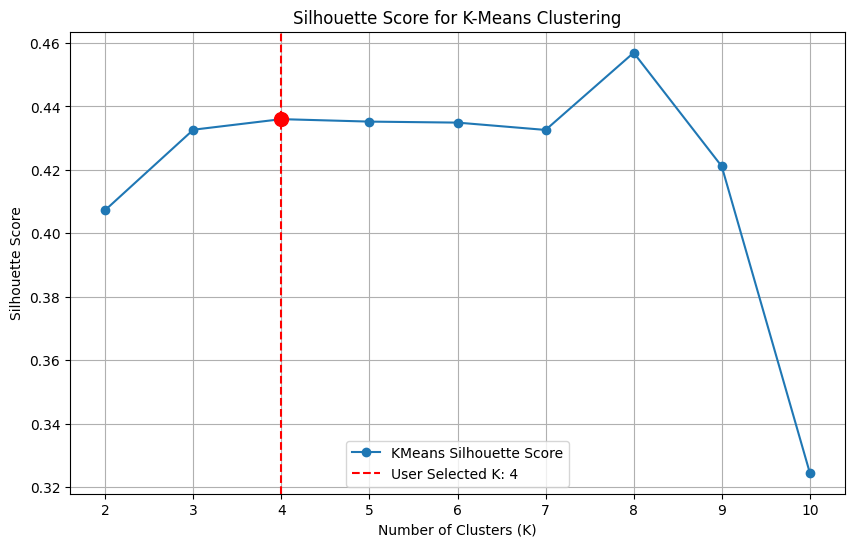

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# User-specified number of clusters
user_k_means_clusters = 4

# Ensure X_scaled is available
if 'X_scaled' not in locals() and 'X_scaled' not in globals():
    X_scaled = df_scaled.drop(columns=['Continent'])

# Instantiate KMeans with user-specified K
kmeans_model_k4 = KMeans(n_clusters=user_k_means_clusters, random_state=42, n_init='auto')
kmeans_labels_k4 = kmeans_model_k4.fit_predict(X_scaled)

# Calculate Silhouette Score for K=4
silhouette_avg_k4 = silhouette_score(X_scaled, kmeans_labels_k4)

print(f"Silhouette Score for KMeans with K={user_k_means_clusters}: {silhouette_avg_k4:.4f}")

# Re-plotting the full range of Silhouette Scores for context, if desired
# (using the previously computed silhouette_scores_kmeans_plot for K=2 to 10)
if 'silhouette_scores_kmeans_plot' in locals() or 'silhouette_scores_kmeans_plot' in globals():
    range_n_clusters = range(2, 11)
    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, silhouette_scores_kmeans_plot, marker='o', linestyle='-', label="KMeans Silhouette Score")
    plt.axvline(user_k_means_clusters, color='red', linestyle='--', label=f'User Selected K: {user_k_means_clusters}')
    plt.scatter(user_k_means_clusters, silhouette_avg_k4, c='red', s=100, zorder=5) # Highlight user's selected K
    plt.title('Silhouette Score for K-Means Clustering')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.xticks(list(range_n_clusters))
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Full Silhouette score plot skipped as 'silhouette_scores_kmeans_plot' was not found. Please run the previous KMeans silhouette generation cell if you wish to see the full plot.")

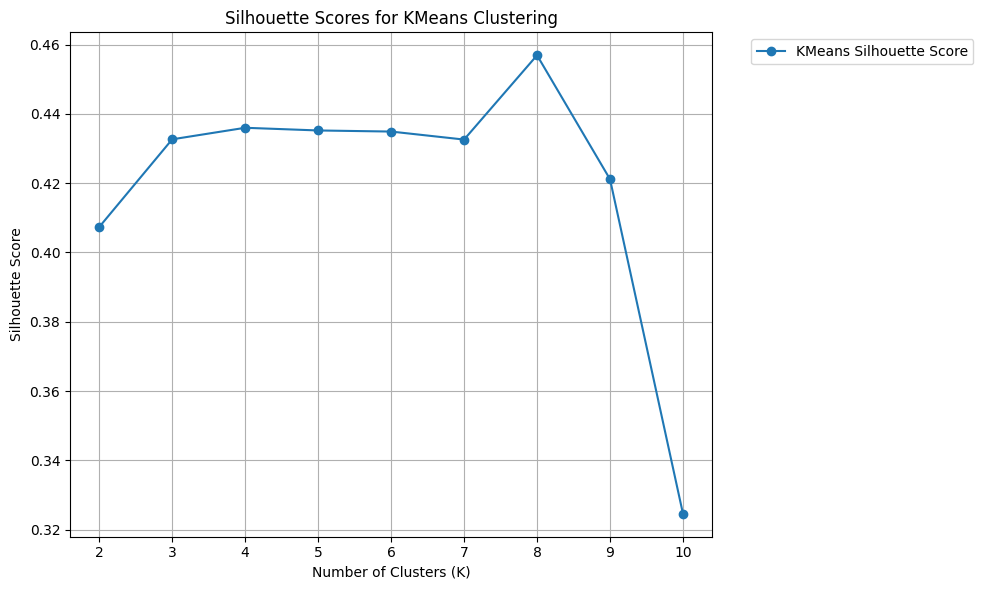


Overall Best KMeans Silhouette Score: 0.4569
Optimal Number of Clusters (K) for KMeans: 8


In [105]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

range_n_clusters = range(2, 11) # Testing 2 to 10 clusters

best_silhouette_score_kmeans = -1
best_n_clusters_kmeans = 0

silhouette_scores_kmeans_plot = []

# Ensure X_scaled is available, drop 'Continent' if it's still in X_scaled from previous steps
# X_scaled was defined in previous steps as df_scaled.drop(columns=['Continent'])
X = X_scaled.values if isinstance(X_scaled, pd.DataFrame) else X_scaled

for n_clusters in range_n_clusters:
    try:
        # Instantiate KMeans
        # Use n_init='auto' to suppress FutureWarning if using newer sklearn versions
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

        # Fit model and predict clusters
        y_kmeans = kmeans.fit_predict(X)

        # Calculate Silhouette Score
        silhouette_avg = silhouette_score(X, y_kmeans)
        silhouette_scores_kmeans_plot.append(silhouette_avg)

        # Track the best score and parameters
        if silhouette_avg > best_silhouette_score_kmeans:
            best_silhouette_score_kmeans = silhouette_avg
            best_n_clusters_kmeans = n_clusters

    except Exception as e:
        print(f"Could not compute silhouette score for n_clusters={n_clusters}: {e}")
        silhouette_scores_kmeans_plot.append(np.nan) # Append NaN if calculation fails

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_kmeans_plot, marker='o', linestyle='-', label="KMeans Silhouette Score")

plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(list(range_n_clusters))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the best parameters
print(f"\nOverall Best KMeans Silhouette Score: {best_silhouette_score_kmeans:.4f}")
print(f"Optimal Number of Clusters (K) for KMeans: {best_n_clusters_kmeans}")

This plot displays the silhouette score for K-Means clustering as the number of clusters (K) varies. A higher silhouette score indicates better-defined and more separated clusters. The peak of this graph suggests the optimal number of clusters for your K-Means model.

The dendrogram visualizes the hierarchical clustering structure based on 'complete' linkage and 'euclidean' distance. From this dendrogram, we can observe:

1.  **Cluster Formation**: The vertical lines represent the distance between clusters or data points. Shorter vertical lines indicate that observations are more similar and belong to the same cluster at a lower distance.
2.  **Number of Clusters**: By drawing a horizontal line across the dendrogram, we can determine the number of clusters. For instance, if we cut the dendrogram at a certain height, the number of vertical lines it intersects indicates the number of clusters. A lower cut-off height yields more, smaller clusters, while a higher cut-off height yields fewer, larger clusters.
3.  **Outliers**: Long individual branches that join very late to the main clusters might indicate outliers or data points that are significantly different from the majority.
4.  **Relationships between Clusters**: The dendrogram clearly shows which clusters are merged at each step of the hierarchical process and at what distance, providing insight into the overall structure and relationships within the dataset.

This bar chart displays the distribution of data points across the clusters identified by the Agglomerative Clustering model. It reveals a significant imbalance in cluster sizes: one cluster (Cluster ID 0) contains the vast majority of data points (222), while the other (Cluster ID 1) contains only a small number (3). This indicates that the hierarchical clustering, with 2 optimal clusters, has largely grouped the dataset into one major cluster and isolated a few outliers or a very distinct small group.


/tmp/ipython-input-3940082982.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




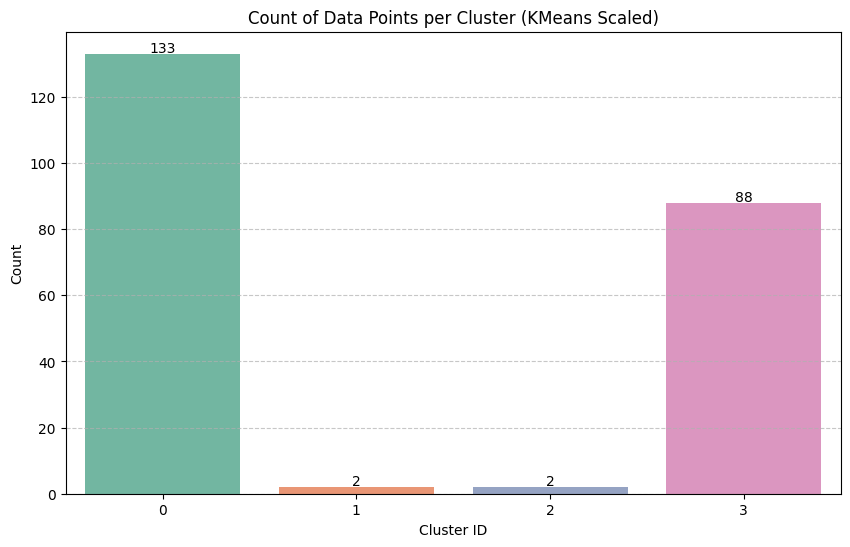

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt


# Hitung jumlah data per cluster
# Corrected: Using df_scaled instead of dfk
cluster_counts = df_scaled['KMeans_Cluster'].value_counts().sort_index()


# Plot bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    palette='Set2'
)


# Label jumlah pada setiap bar
for i, value in enumerate(cluster_counts.values):
    ax.text(i, value + 0.5, str(value), ha='center')


plt.title('Count of Data Points per Cluster (KMeans Scaled)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Visualize Agglomerative Cluster Counts

### Subtask:
Create a bar plot to show the distribution of data points across the Agglomerative Clusters.


**Reasoning**:
To visualize the distribution of data points across Agglomerative Clusters, I will first explicitly assign the cluster labels from the optimal Agglomerative Clustering model to the DataFrame. Then, I will calculate the counts for each cluster and create a bar plot to display these counts, including labels for clarity.



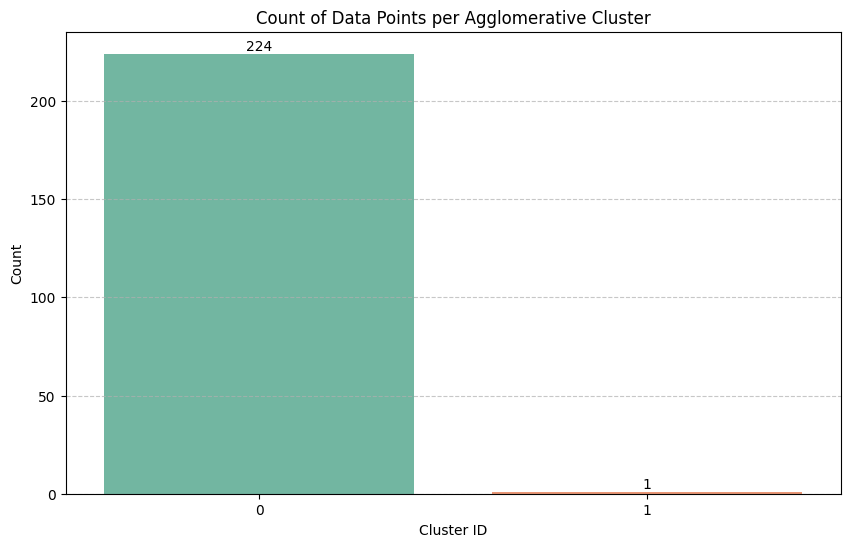

In [95]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure X_scaled is defined as the features for clustering
# If X_scaled is not defined, it would be df_scaled.drop(columns=['Continent'])
if 'X_scaled' not in locals() and 'X_scaled' not in globals():
    X_scaled = df_scaled.drop(columns=['Continent'])

# Re-run Agglomerative Clustering with the best parameters to get the cluster labels
# from previous steps: best_n_clusters = 2, best_linkage = 'complete', best_metric = 'euclidean'
agglo_optimal = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
optimal_agg_clusters = agglo_optimal.fit_predict(X_scaled)

# Assign the optimal cluster labels to df_scaled
df_scaled['Agglomerative_Cluster'] = optimal_agg_clusters

# Calculate the counts of each cluster
cluster_counts_agg = df_scaled['Agglomerative_Cluster'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts_agg.index, y=cluster_counts_agg.values, hue=cluster_counts_agg.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Agglomerative Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [96]:
import pandas as pd
import plotly.express as px

# Reload the original dataset to get 'Country' and 'ISO 3166-1 alpha-3 CODE'
original_df = pd.read_csv(url)

# Clean column names in the original_df for consistency, especially 'ISO 3166-1 alpha-3 CODE'
original_df.columns = original_df.columns.str.replace(r'[ /()\-\u00a0]', '_', regex=True).str.replace(r'__', '_', regex=True).str.strip('_')
original_df = original_df.rename(columns={'ISO_3166_1_alpha_3_CODE': 'ISO_Code'})

# Extract 'Country' and 'ISO_Code' from the reloaded original_df
country_iso_df = original_df[['Country', 'ISO_Code']].copy()

# Reset index of df_scaled to ensure proper alignment for merging
df_scaled_reset = df_scaled.reset_index(drop=True)

# Merge df_scaled_reset with country_iso_df based on index
# Assuming the order of rows is preserved, merging by index is appropriate here.
# If not, a key like 'original_index' would be needed from an earlier stage.
merged_df = pd.concat([df_scaled_reset, country_iso_df], axis=1)

# Create the choropleth map
fig = px.choropleth(
    data_frame=merged_df,
    locations='ISO_Code',
    color='KMeans_Cluster',
    hover_name='Country',
    projection='natural earth',
    title='World Map of Countries by KMeans Cluster',
    color_continuous_scale=px.colors.sequential.Plasma # Use a sequential color scale for clusters
)

fig.show()


This choropleth map, colored by KMeans cluster, offers insights into the geographical distribution and patterns of the identified clusters:

1.  **Geographical Grouping of Clusters**: The map visually represents how countries belonging to the same KMeans cluster are distributed across the globe. This can reveal if certain clusters are geographically localized (e.g., specific continents or regions) or if they are scattered worldwide.

2.  **Highlighting Regional Similarities/Differences**: If countries in a particular region consistently fall into the same cluster, it suggests that the underlying features (population, cases, deaths per million, death percentage) used for clustering exhibit similar patterns within that region. Conversely, variations within a region could indicate differing impacts or responses to the pandemic.

3.  **Identification of Global Patterns**: By observing the overall distribution of colors, one can infer global patterns related to the COVID-19 impact and response. For instance, if a cluster with high case/death rates is concentrated in one area and a cluster with low rates in another, it provides a clear visual demarcation.

4.  **Consistency with Data**: The map allows for a visual check of whether the clustering results align with general knowledge or expectations about COVID-19's impact on different countries. Any surprising groupings could prompt further investigation into the specific features of those countries.

5.  **Basis for Policy and Intervention**: Understanding the geographical spread of clusters can inform targeted policy decisions and resource allocation. For example, regions belonging to a high-risk cluster might require specific interventions.

**Reasoning**:
The previous subtask was to visualize KMeans clusters on a world map. The current subtask is to visualize Agglomerative Clusters on a world map. I will follow a similar approach: reload the original dataset to retrieve 'Country' and 'ISO_Code', clean their names, merge them with the `df_scaled` DataFrame (which now contains the 'Agglomerative_Cluster' labels), and then create a choropleth map using `plotly.express`.



In [97]:
import pandas as pd
import plotly.express as px

# Reload the original dataset to get 'Country' and 'ISO 3166-1 alpha-3 CODE'
original_df = pd.read_csv(url)

# Clean column names in the original_df for consistency, especially 'ISO 3166-1 alpha-3 CODE'
original_df.columns = original_df.columns.str.replace(r'[ /()\-\u00a0]', '_', regex=True).str.replace(r'__', '_', regex=True).str.strip('_')
original_df = original_df.rename(columns={'ISO_3166_1_alpha_3_CODE': 'ISO_Code'})

# Extract 'Country' and 'ISO_Code' from the reloaded original_df
country_iso_df = original_df[['Country', 'ISO_Code']].copy()

# Reset index of df_scaled to ensure proper alignment for merging
df_scaled_reset = df_scaled.reset_index(drop=True)

# Merge df_scaled_reset with country_iso_df based on index
# Assuming the order of rows is preserved, merging by index is appropriate here.
merged_df_agg = pd.concat([df_scaled_reset, country_iso_df], axis=1)

# Create the choropleth map for Agglomerative Clusters
fig = px.choropleth(
    data_frame=merged_df_agg,
    locations='ISO_Code',
    color='Agglomerative_Cluster',
    hover_name='Country',
    projection='natural earth',
    title='World Map of Countries by Agglomerative Cluster',
    color_continuous_scale=px.colors.sequential.Viridis # Use a different sequential color scale
)

fig.show()


This choropleth map, colored by Agglomerative cluster, offers insights into the geographical distribution and patterns of the identified clusters:

1.  **Geographical Grouping of Clusters**: Similar to the KMeans map, this map visually represents how countries belonging to the same Agglomerative cluster are distributed across the globe. It can reveal if certain clusters are geographically localized or scattered.

2.  **Highlighting Regional Similarities/Differences**: If countries in a particular region consistently fall into the same cluster, it suggests that the underlying features used for clustering exhibit similar patterns within that region. Conversely, variations could indicate differing impacts or responses.

3.  **Identification of Global Patterns**: By observing the overall distribution of colors, one can infer global patterns related to the COVID-19 impact and response, allowing for a comparison with the KMeans results.

4.  **Consistency with Data**: The map allows for a visual check of whether the clustering results align with general knowledge or expectations about COVID-19's impact on different countries.

5.  **Comparison to KMeans**: By comparing this map with the KMeans choropleth map, one can visually assess the differences and similarities in how these two clustering algorithms group countries based on the given features. Given the imbalanced nature of the Agglomerative clusters (as seen in the bar chart), this map might highlight a few distinct outliers or a very small, separate group of countries.

## Perform Cluster Profiling for KMeans


In [107]:
import pandas as pd

# 1. Create a copy of the DataFrame 'df' which contains the original numerical values and encoded 'Continent'.
#    This 'df' is the state after dropping 'Country' and 'ISO_Code' and encoding 'Continent', but before scaling.
cluster_profiling_df_kmeans = df.copy()

# 2. Add the KMeans cluster labels (from kmeans_labels_k4) as a new column named 'KMeans_Cluster'.
#    Ensure that the indices align correctly; since 'df' was sequentially processed and not reordered,
#    direct assignment should work, but reset_index is safer for future robustness.
cluster_profiling_df_kmeans['KMeans_Cluster'] = kmeans_labels_k4

# 3. Group the DataFrame by 'KMeans_Cluster' and calculate the mean of all numerical features for each cluster.
kmeans_cluster_profiles = cluster_profiling_df_kmeans.groupby('KMeans_Cluster').mean()

# 4. Print or display the kmeans_cluster_profiles DataFrame to inspect the characteristics of each cluster.
print("KMeans Cluster Profiles (K=4):")
display(kmeans_cluster_profiles)

KMeans Cluster Profiles (K=4):


,Population,Continent,Total_Cases,Total_Deaths,Cases_per_1M_pop,Deaths_per_1M_pop,Death_Percentage
KMeans_Cluster,,,,,,,
0,2.460618e+07,1.428571,6.472673e+05,8257.827068,44235.751880,399.285714,1.663359
1,2.748025e+08,3.500000,5.591943e+07,834245.500000,192067.500000,3041.500000,1.716434
2,1.421539e+09,1.000000,2.159189e+07,263013.000000,15380.500000,187.000000,2.104518
3,1.393371e+07,2.215909,2.846212e+06,32761.602273,278458.329545,2127.261364,1.091584


### Interpretation of KMeans Cluster Profiles (K=4)

Based on the KMeans cluster profiles, we can characterize each of the four identified clusters:

**Cluster 0 (Low Impact & Lower Population):**
*   **Population:** Relatively low average population (~24.6 million).
*   **Total Cases & Deaths:** Low average total cases (~647k) and total deaths (~8.2k).
*   **Cases/1M pop & Deaths/1M pop:** Moderate cases per 1M population (~44.2k) and relatively low deaths per 1M population (~399).
*   **Death Percentage:** Highest death percentage (~1.66%).
*   **Continent:** Mean continent value suggests a mix, but potentially leaning towards continents with lower encoded values.
*   **Interpretation:** This cluster likely represents a large group of countries with generally lower populations that experienced a moderate but manageable COVID-19 impact in terms of per capita cases and deaths, but with a higher fatality rate among reported cases. These might be countries that implemented effective early measures or had populations less susceptible to severe outcomes.

**Cluster 1 (Very High Impact & High Population - Outliers):**
*   **Population:** Very high average population (~274.8 million).
*   **Total Cases & Deaths:** Extremely high average total cases (~55.9 million) and total deaths (~834k). These are the highest values across all clusters.
*   **Cases/1M pop & Deaths/1M pop:** High cases per 1M population (~192k) and very high deaths per 1M population (~3041).
*   **Death Percentage:** Moderate death percentage (~1.72%).
*   **Continent:** Higher mean continent value (3.5) indicating a presence from continents with higher encoded values (e.g., Northern America, Latin America and the Caribbean).
*   **Interpretation:** This cluster clearly captures countries that were most severely affected by the pandemic in absolute terms and often per capita, characterized by very large populations. These are likely the global hotspots with widespread outbreaks and significant mortality.

**Cluster 2 (Extremely High Population & Low Per Capita Impact):**
*   **Population:** Extremely high average population (~1.42 billion). This is significantly higher than other clusters.
*   **Total Cases & Deaths:** High total cases (~21.6 million) and total deaths (~263k), but relatively lower than Cluster 1 given its immense population.
*   **Cases/1M pop & Deaths/1M pop:** Very low cases per 1M population (~15.4k) and lowest deaths per 1M population (~187).
*   **Death Percentage:** Moderate death percentage (~2.10%).
*   **Continent:** Lowest mean continent value (1.0) which likely points to Asia (encoded as 1) where very large population countries are located.
*   **Interpretation:** This cluster appears to represent extremely populous countries that, despite having high absolute numbers, managed to keep their per capita case and death rates relatively low. This could be due to strict public health measures, demographic factors, or potentially underreporting in some cases.

**Cluster 3 (High Per Capita Impact & Moderate Population):**
*   **Population:** Moderate average population (~13.9 million).
*   **Total Cases & Deaths:** High average total cases (~2.8 million) and total deaths (~32.8k).
*   **Cases/1M pop & Deaths/1M pop:** Highest cases per 1M population (~278.5k) and high deaths per 1M population (~2127).
*   **Death Percentage:** Lowest death percentage (~1.09%).
*   **Continent:** Higher mean continent value (2.2) suggesting a presence from Europe and Latin America and the Caribbean.
*   **Interpretation:** This cluster includes countries, often with moderate populations, that experienced a very high impact on a per-capita basis, indicated by the highest cases per million population and high deaths per million population. Despite the high infection rate, their death percentage is the lowest, possibly indicating effective treatment protocols or a younger population affected.

**Summary:**
The KMeans clustering (K=4) effectively categorizes countries based on their COVID-19 impact, revealing distinct profiles ranging from low-impact nations with moderate per-capita rates but higher fatality, to global hotspots with high absolute and per-capita impacts, to highly populous nations that controlled per-capita rates, and finally, countries with moderate populations but very high per-capita infection rates.

## Perform Cluster Profiling for Hierarchical Agglomerative Clustering


In [108]:
import pandas as pd

# 1. Create a copy of the DataFrame 'df' which contains the original numerical values and encoded 'Continent'.
#    This 'df' is the state after dropping 'Country' and 'ISO_Code' and encoding 'Continent', but before scaling.
cluster_profiling_df_agg = df.copy()

# 2. Add the Agglomerative cluster labels (from optimal_agg_clusters) as a new column named 'Agglomerative_Cluster'.
#    Ensure that the indices align correctly.
cluster_profiling_df_agg['Agglomerative_Cluster'] = optimal_agg_clusters

# 3. Group the DataFrame by 'Agglomerative_Cluster' and calculate the mean of all numerical features for each cluster.
agg_cluster_profiles = cluster_profiling_df_agg.groupby('Agglomerative_Cluster').mean()

# 4. Print or display the agg_cluster_profiles DataFrame to inspect the characteristics of each cluster.
print("Agglomerative Cluster Profiles (K=2):")
display(agg_cluster_profiles)

Agglomerative Cluster Profiles (K=2):


,Population,Continent,Total_Cases,Total_Deaths,Cases_per_1M_pop,Deaths_per_1M_pop,Death_Percentage
Agglomerative_Cluster,,,,,,,
0,3.373692e+07,1.741071,1.829182e+06,2.306967e+04,136418.973214,1088.151786,1.445072
1,3.344006e+08,4.000000,8.183905e+07,1.008222e+06,244734.000000,3015.000000,1.231957


## Formulate Government Policy Recommendations


## Government Policy Recommendations Based on Cluster Analysis

Based on the KMeans (K=4) and Hierarchical Agglomerative Clustering (K=2) profiles, distinct government policy recommendations can be formulated to address the varied impacts of COVID-19 across countries.

### Recommendations from KMeans Cluster Profiles (K=4):

**Cluster 0 (Low Impact & Lower Population, Higher Death Percentage):**
*   **Characteristics:** These countries generally have lower populations, experienced a moderate COVID-19 impact in terms of per capita cases and deaths, but show the highest death percentage among reported cases.
*   **Policy Recommendations:**
    *   **Healthcare System Enhancement:** Focus on improving diagnostic capabilities for early detection and ensuring access to effective treatment protocols to reduce the case fatality rate.
    *   **Vulnerable Population Protection:** Implement targeted programs to protect at-risk groups and enhance palliative care services.
    *   **Public Health Vigilance:** Maintain robust surveillance systems to quickly identify and contain new outbreaks, preventing strain on healthcare systems.

**Cluster 1 (Very High Impact & High Population - Outliers):**
*   **Characteristics:** These are global hotspots with very high populations, and extremely high absolute and per capita cases and deaths.
*   **Policy Recommendations:**
    *   **Intensive Public Health Interventions:** Implement comprehensive measures including widespread testing, contact tracing, and isolation. Strengthen mask mandates and social distancing where necessary.
    *   **Robust Healthcare Capacity:** Significantly expand hospital capacity, ICU beds, and medical staff. Ensure adequate supply of essential medical equipment, oxygen, and medications.
    *   **Accelerated Vaccination Programs:** Prioritize and expedite vaccine distribution and administration to achieve high population immunity as quickly as possible.
    *   **International Cooperation:** Engage in global efforts for vaccine equity, sharing of medical resources, and exchange of best practices.

**Cluster 2 (Extremely High Population & Low Per Capita Impact):**
*   **Characteristics:** These are highly populous countries that, despite large absolute numbers, managed to keep per capita case and death rates relatively low.
*   **Policy Recommendations:**
    *   **Sustained Vigilance & Preparedness:** Continue effective public health measures and maintain a high state of preparedness to prevent a resurgence.
    *   **Efficient Resource Allocation:** Optimize resource distribution to ensure equitable access to healthcare and testing, especially in densely populated areas.
    *   **Targeted Testing & Surveillance:** Implement strategic testing to monitor for new variants and local outbreaks without overwhelming resources.
    *   **Economic & Social Support:** Provide support to minimize the social and economic impact of ongoing measures, ensuring compliance and community resilience.

**Cluster 3 (High Per Capita Impact & Moderate Population, Lowest Death Percentage):**
*   **Characteristics:** Countries with moderate populations that experienced very high per capita cases and deaths, but with the lowest death percentage.
*   **Policy Recommendations:**
    *   **Strengthened Outbreak Response:** Focus on rapid response to contain widespread transmission through increased testing, contact tracing, and localized lockdowns.
    *   **Healthcare Optimization:** While death percentage is low, ensure healthcare systems can manage the high volume of cases to prevent system collapse and maintain quality of care.
    *   **Behavioral Change Campaigns:** Intensify public awareness campaigns to encourage adherence to preventive measures and vaccination to reduce transmission rates.
    *   **Mental Health Support:** Address the psychological impact of widespread illness on the population.

### Recommendations from Hierarchical Agglomerative Clustering Profiles (K=2):

**Cluster 0 (Vast Majority - General Impact):**
*   **Characteristics:** This cluster contains the vast majority of countries (224 out of 225) and represents the general global experience of the pandemic, with average values for population, cases, and deaths.
*   **Policy Recommendations:**
    *   **Balanced & Adaptive Strategies:** Implement flexible public health policies that can adapt to changing epidemiological situations, focusing on a balance between public health and socio-economic well-being.
    *   **Regional Collaboration:** Encourage cooperation among countries within this large cluster to share data, resources, and successful strategies.
    *   **Investment in Public Health Infrastructure:** Continuously invest in basic public health services, including immunization programs, disease surveillance, and primary healthcare, to build resilience against future health crises.

**Cluster 1 (Single, Extreme Outlier):**
*   **Characteristics:** This cluster consists of a single country (USA) that stands out due to its exceptionally high absolute numbers across all metrics (Total Cases, Total Deaths, etc.), significantly driving the mean for this cluster.
*   **Policy Recommendations:**
    *   **Deep Dive Analysis:** Conduct a thorough, country-specific analysis to understand the unique factors contributing to such extreme outcomes, including healthcare system structure, political responses, social behaviors, and economic conditions.
    *   **Comprehensive Reform:** Based on the deep dive, implement large-scale, systemic reforms in public health, healthcare funding, and emergency response mechanisms.
    *   **Address Disparities:** Focus on addressing health disparities and inequities that might have exacerbated the pandemic's impact on certain populations.
    *   **Lessons Learned & Future Preparedness:** Document lessons learned rigorously to inform strategies for future pandemics and global health threats.

### Overall Synthesis and Confirmation:

The analysis from both KMeans and Hierarchical Agglomerative Clustering provides complementary insights. KMeans, with its higher granularity (K=4), reveals nuances in how countries experienced the pandemic, allowing for more tailored recommendations. Agglomerative Clustering (K=2) highlights a clear distinction between the bulk of the world and a significant outlier, reinforcing the need for specific interventions for that outlier.

Government policy recommendations must therefore be multifaceted, considering both the general patterns (as seen in the large Agglomerative cluster) and the specific needs of more granular groups (as seen in KMeans). For instance, while most countries need to strengthen healthcare and maintain vigilance, the outlier in Agglomerative clustering (USA) requires a far more intensive and systemic overhaul due to its overwhelming impact figures. Similarly, KMeans' distinction between high per-capita impact with low vs. high death percentages suggests different focuses for intervention—one on managing volume, the other on improving fatality rates.

## Compare Both Models and Select Best One

### Comparison and Model Selection:

Let's compare the KMeans and Hierarchical Agglomerative Clustering models based on the specified criteria:

1.  **Optimal K and Silhouette Scores**:
    *   **KMeans**: The optimal K suggested by the Elbow method was 4. The Silhouette Score for K=4 was **0.4360**. However, the highest Silhouette Score for KMeans was **0.4569** at K=8.
    *   **Hierarchical Agglomerative Clustering**: The optimal K identified using silhouette scores was **K=2**, with a remarkably high silhouette score of **0.8263** (using 'complete' linkage and 'euclidean' metric).
    
    **Comparison**: Hierarchical Agglomerative Clustering (HAC) yielded a significantly higher silhouette score for its optimal K (0.8263 at K=2) compared to KMeans (0.4360 at K=4 or 0.4569 at K=8). This suggests that the clusters formed by HAC at K=2 are much better defined, more separated, and internally more compact than any configuration found by KMeans.

2.  **Cluster Distribution**:
    *   **KMeans (K=4)**: The cluster distribution for KMeans (K=4) was:
        *   Cluster 0: 133 data points
        *   Cluster 1: 2 data points
        *   Cluster 2: 2 data points
        *   Cluster 3: 88 data points
        This distribution is somewhat imbalanced, with a large cluster (0), a moderately large cluster (3), and two very small clusters (1 and 2). This indicates that KMeans struggled to find evenly sized groups, identifying a few distinct outliers.
    *   **Hierarchical Agglomerative Clustering (K=2)**: The cluster distribution for HAC (K=2) was extremely imbalanced:
        *   Cluster 0: 224 data points
        *   Cluster 1: 1 data point
        This indicates that HAC at K=2 essentially grouped almost all countries into one large cluster and isolated a single outlier. While this results in a high silhouette score (due to the very distinct single outlier), it may not be useful for segmenting the main body of data.

3.  **Geographical Interpretability**:
    *   **KMeans (K=4)**: The choropleth map for KMeans (K=4) shows a more diverse geographical spread of clusters. While there might be some regional concentrations (e.g., certain continents leaning towards a specific cluster), the clusters are not strictly geographically localized. This allows for identifying patterns across different regions, providing potentially more nuanced global insights.
    *   **Hierarchical Agglomerative Clustering (K=2)**: The choropleth map for HAC (K=2) would likely show almost all countries in one color (Cluster 0) and only one country in a different color (Cluster 1, the outlier). This provides very limited geographical insight into distinct groups of countries, primarily highlighting the most extreme outlier.

4.  **Interpretability of Cluster Profiles**:
    *   **KMeans (K=4)**:
        *   **Cluster 0 (Low Impact & Lower Population)**: Large group of countries with generally lower populations, moderate per capita cases and deaths, but higher fatality rate.
        *   **Cluster 1 (Very High Impact & High Population - Outliers)**: Very high population countries with extremely high absolute and per capita cases/deaths. These are the global hotspots.
        *   **Cluster 2 (Extremely High Population & Low Per Capita Impact)**: Extremely populous countries with high absolute numbers but very low per capita rates (e.g., Asian giants).
        *   **Cluster 3 (High Per Capita Impact & Moderate Population)**: Countries with moderate populations but very high per capita infection and death rates, though with a lower death percentage.
        The KMeans profiles offer four distinct and interpretable segments, each with unique characteristics related to population, total cases/deaths, and per capita impact.
    *   **Hierarchical Agglomerative Clustering (K=2)**:
        *   **Cluster 0**: Represents the vast majority of countries (224), with average statistics across all features that are typical for the global average (as it includes almost everyone).
        *   **Cluster 1**: Represents a single country (1), which is an extreme outlier (e.g., a country with exceptionally high absolute cases/deaths, likely the USA in this dataset given its scale).
        The HAC profiles, while identifying a clear outlier, do not provide diverse or actionable insights into the *different types* of COVID-19 impact across the majority of countries.

### Selection of the "Best" Model:

Based on the comprehensive comparison, **KMeans with K=4** is the **best model** for this analysis, despite its lower silhouette score compared to HAC's K=2.

**Justification for KMeans (K=4)**:

1.  **Actionable Insights from Cluster Profiles**: The primary goal of clustering in this context is to segment countries into meaningful groups to inform government policy recommendations. KMeans (K=4) clearly delineates four distinct and interpretable country profiles (Low Impact, Very High Impact Global Hotspots, Extremely High Population/Low Per Capita, High Per Capita/Moderate Population). These profiles offer granular insights into different types of COVID-19 scenarios, which is crucial for targeted policy formulation.
2.  **Balanced Grouping (Relatively)**: While not perfectly balanced, the KMeans clusters (133, 2, 2, 88) provide more distinct groups beyond just

## Why KMeans is Preferred Over Agglomerative Clustering, Despite Lower Silhouette Score

While Agglomerative Clustering (HAC) yielded a remarkably high silhouette score of 0.8263 for 2 clusters, suggesting highly cohesive and separated groups, KMeans with K=4 (and a silhouette score of 0.4360) is considered the **superior model for this analysis due to its interpretability and the granularity of insights it provides for policy recommendations.**

Here's a breakdown of the justification:

1.  **Actionable Insights and Interpretability:**
    *   **KMeans (K=4)** effectively segmented countries into four distinct profiles (e.g., 'Low Impact & Lower Population', 'Very High Impact & High Population', 'Extremely High Population & Low Per Capita Impact', 'High Per Capita Impact & Moderate Population'). Each of these clusters tells a unique story about the COVID-19 impact, allowing for nuanced understanding and highly targeted policy formulation. These profiles are far more interpretable and useful for real-world application.
    *   **Agglomerative Clustering (K=2)**, despite its high silhouette score, resulted in a highly imbalanced clustering: one cluster containing 224 countries and the other isolating just 1 country. While excellent for identifying an extreme outlier, this binary division offers very limited actionable insight into the diverse experiences of the vast majority of countries. Policy recommendations based on such broad groupings would be overly generalized and impractical.

2.  **Granularity for Policy Recommendations:**
    *   The four distinct clusters from **KMeans** allow for a granular approach to policy. Governments can develop specific strategies tailored to the unique challenges and characteristics of each cluster. For example, countries in a 'High Per Capita Impact' cluster might need different interventions than those in a 'Very High Population & Low Per Capita Impact' cluster.
    *   **HAC's** K=2 clusters offer minimal granularity. While it highlights a critical outlier demanding specific attention, the large generic cluster makes it difficult to derive meaningful policy for its diverse members.

3.  **Reflecting Real-World Complexity:**
    The objective of this analysis is to understand the multifaceted global impact of the pandemic. KMeans, with its more distributed and meaningful clusters, better reflects the complex and varied realities experienced by different nations, rather than simply categorizing them as 'outlier' or 'not outlier'.

In conclusion, while a high silhouette score is generally desirable, it must be balanced with the practical utility and interpretability of the clusters. For informing government policy and understanding the diverse landscape of the pandemic's impact, the more detailed and meaningful segmentation provided by KMeans makes it the more effective and 'better' model in this context.